# Tìm kiếm: Giải quyết mê cung bằng cách sử dụng tác nhân dựa trên mục tiêu.
Họ tên sinh viên: Trần Văn Hiếu, Hồ Ngọc Đăng Khoa

Các công cụ AI được dùng: Grok, GPT Generate

Ký hiệu bài làm: Hiếu, Khoa

## Kết quả Học tập

* Xây dựng các bài toán tìm kiếm bằng cách sử dụng các thành phần chính như trạng thái ban đầu, hành động và trạng thái mục tiêu trong một môi trường xác định, hoàn toàn có thể quan sát được.
* Triển khai và so sánh các thuật toán tìm kiếm bao gồm BFS, DFS, GBFS, A* và IDS để tìm đường trong mê cung.
* Phân tích hiệu suất của thuật toán bằng cách đo chi phí đường đi, số lần mở nút, độ sâu và mức sử dụng bộ nhớ trên các loại mê cung khác nhau.
* Sử dụng các công cụ trực quan hóa để đại diện cho các đường đi trong mê cung và hỗ trợ gỡ lỗi và phân tích.

## Hướng dẫn

Tổng điểm: Sinh viên đại học 100 + 5 điểm thưởng / Sinh viên sau đại học 110

Hoàn thành sổ tay này. Sử dụng các ô sổ tay đã cung cấp và chèn thêm các ô mã và ô markdown khi cần. Nộp tệp sổ tay và sổ tay đã được hiển thị hoàn toàn với tất cả các đầu ra dưới dạng tệp HTML.


## Giới thiệu

Đại lý phải sử dụng bản đồ được cung cấp để lập kế hoạch một lộ trình qua mê cung từ vị trí bắt đầu $S$ đến vị trí mục tiêu $G$. Đây là một bài tập lập kế hoạch cho một đại lý dựa trên mục tiêu, vì vậy bạn không cần phải triển khai một môi trường, chỉ cần sử dụng bản đồ để tìm kiếm một lộ trình. Khi kế hoạch đã được lập, tác nhân trong môi trường xác định (tức là, hàm chuyển tiếp là xác định với kết quả của mỗi cặp trạng thái/hành động được cố định và không có sự ngẫu nhiên) chỉ cần theo con đường và không cần phải quan tâm đến các cảm nhận.
Đây cũng được gọi là một **[hệ thống vòng hở](https://en.wikipedia.org/wiki/Open-loop_controller).**
Giai đoạn thực thi là không quan trọng và có thể được thực hiện bằng cách sử dụng một tác nhân phản xạ dựa trên mô hình mà bỏ qua tất cả các cảm nhận và chỉ theo kế hoạch. Chúng tôi không thực hiện điều này trong bài tập này.

Với việc đại lý có một bản đồ đầy đủ và chính xác, môi trường là **hoàn toàn có thể quan sát, rời rạc, xác định và đã biết.**
Nhớ:

* **Hoàn toàn có thể quan sát** có nghĩa là tác nhân có thể thấy trạng thái của nó và những hành động có sẵn. Điều đó có nghĩa là **các cảm nhận chứa trạng thái hiện tại đầy đủ.**
Ở đây, trong quá trình lập kế hoạch, tác nhân luôn thấy tọa độ x và y của nó trên bản đồ và cũng tìm kiếm khi nó đã đạt được trạng thái mục tiêu.
* **Rời rạc** có nghĩa là chúng ta có một **tập hợp hữu hạn các trạng thái.** Mê cung có một tập hợp hữu hạn các ô mà tác nhân có thể ở trong đó.
**Xác định** có nghĩa là **hàm chuyển tiếp không chứa sự ngẫu nhiên.** Một hành động trong một trạng thái luôn tạo ra cùng một kết quả. Đi về phía nam từ trạng thái bắt đầu sẽ luôn dẫn đến cùng một ô.
* **Biết** có nghĩa là tác nhân **biết hàm chuyển tiếp hoàn chỉnh.** Tác nhân có bản đồ và do đó biết cách vị trí của nó thay đổi khi nó đi bộ theo một hướng.

Các triển khai thuật toán tìm kiếm cây mà bạn tìm thấy trên mạng thường đến từ các khóa học về cấu trúc dữ liệu và có mục đích khác với tìm kiếm cây trong trí tuệ nhân tạo. Các thuật toán này giả định rằng bạn đã có một cây trong bộ nhớ. Chúng tôi quan tâm đến việc tạo ra một cây tìm kiếm một cách động với mục tiêu tìm ra một con đường tốt/ tốt nhất từ nút gốc đến trạng thái mục tiêu. Theo mã giả được trình bày trong sách giáo khoa (và được sao chép trong các slide) một cách chặt chẽ. Lý tưởng nhất, chúng ta muốn chỉ tìm kiếm một phần nhỏ của mê cung, tức là tạo ra một cây tìm kiếm với càng ít nút càng tốt.

Một số mê cung cho bài tập này được lưu trữ dưới dạng tệp văn bản. Dưới đây là một ví dụ mê cung nhỏ:

In [1]:
with open("small_maze.txt", "r") as f:
    maze_str = f.read()
print(maze_str)

XXXXXXXXXXXXXXXXXXXXXX
X XX        X X      X
X    XXXXXX X XXXXXX X
XXXXXX     S  X      X
X    X XXXXXX XX XXXXX
X XXXX X         X   X
X        XXX XXX   X X
XXXXXXXXXX    XXXXXX X
XG         XX        X
XXXXXXXXXXXXXXXXXXXXXX



**Lưu ý:** Nếu bạn nhận được lỗi ở đây rằng không thể tìm thấy tệp, thì bạn cần tải xuống. Xem [Cách làm việc trên các bài tập.](https://github.com/mhahsler/CS7320-AI/blob/master/HOWTOs/working_on_assignments.md)

## Phân tích và in đẹp mê cung

Mê cung cũng có thể được hiển thị bằng màu sắc sử dụng mã trong mô-đun [maze_helper.py](maze_helper.py). Mã này phân tích chuỗi đại diện cho mê cung và chuyển đổi nó thành một mảng 2 chiều `numpy` mà bạn có thể sử dụng trong việc triển khai của mình. Vị trí được đại diện dưới dạng một cặp 2 phần của dạng `(hàng, cột)`.

In [2]:
import maze_helper as mh

maze = mh.parse_maze(maze_str)

# look at a position in the maze by subsetting the 2d array
print("Position(0,0):", maze[0, 0])

# there is also a helper function called `look(maze, pos)` available
# which uses a 2-tuple for the position.
print("Position(8,1):", mh.look(maze, (8, 1)))

Position(0,0): X
Position(8,1): G


Một hàm trợ giúp để trực quan hóa mê cung cũng có sẵn.

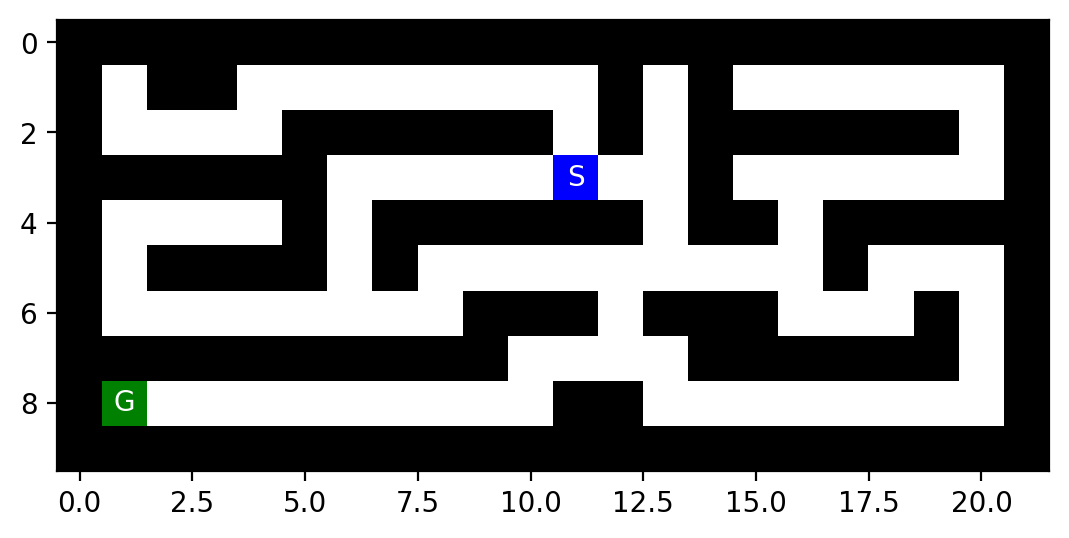

In [3]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
# use higher resolution images in notebooks

mh.show_maze(maze)

Tìm vị trí `(x,y)` của điểm bắt đầu và điểm kết thúc bằng cách sử dụng hàm trợ giúp `find_pos()`.

In [4]:
print("Start location:", mh.find_pos(maze, what = "S"))
print("Goal location:", mh.find_pos(maze, what = "G"))

Start location: (3, 11)
Goal location: (8, 1)


Tài liệu chức năng trợ giúp.

In [5]:
help(mh)

Help on module maze_helper:

NAME
    maze_helper

DESCRIPTION
    Code for the Maze Assignment by Michael Hahsler
    Usage:
        import maze_helper as mh
        mh.show_some_mazes()

FUNCTIONS
    animate_maze(result, repeat=False)
        Build an animation from a list of mazes. Assumes that results has the elements:
        path, reached, actions and maze_anim with a list of maze arrays.

    find_pos(maze, what='S')
        Find start/goal in a maze and returns the first one.
        Caution: there is no error checking!

        Parameters:
        maze: a array with characters prodced by parse_maze()
        what: the letter to be found ('S' for start and 'G' for goal)

        Returns:
        a tupple (x, y) for the found position.

    look(maze, pos)
        Look at the label of a square with the position as an array of the form (x, y).

    maze_to_matrix(maze)
        convert a maze a numeric numpy array for visualization via imshow.

    parse_maze(maze_str)
        Co

Bạn sẽ cần tạo một bản sao cục bộ của tệp module [maze_helper.py](maze_helper.py) trong cùng thư mục nơi có sổ tay của bạn.

## Cấu trúc cây

Đây là một triển khai của cấu trúc nút cơ bản cho các thuật toán tìm kiếm (xem Hình 3.7 trên trang 73). Tôi đã thêm một phương pháp trích xuất đường đi từ nút gốc đến nút hiện tại. Nó có thể được sử dụng để lấy đường đi khi việc tìm kiếm hoàn tất.

In [6]:
class Node:
    def __init__(self, pos, parent, action, cost):
        self.pos = tuple(pos)    # the state; positions are (row,col)
        self.parent = parent     # reference to parent node. None means root node.
        self.action = action     # action used in the transition function (root node has None)
        self.cost = cost         # for uniform cost this is the depth. It is also g(n) for A* search

    def __str__(self):
        return f"Node - pos = {self.pos}; action = {self.action}; cost = {self.cost}"

    def get_path_from_root(self):
        """returns nodes on the path from the root to the current node."""
        node = self
        path = [node]

        while not node.parent is None:
            node = node.parent
            path.append(node)

        path.reverse()

        return(path)

Nếu cần, bạn có thể thêm nhiều trường vào lớp như giá trị heuristic $h(n)$ hoặc $f(n)$.

Các ví dụ về cách tạo và sử dụng cây cũng như thông tin về quản lý bộ nhớ có thể được tìm thấy [tại đây](../HOWTOs/trees.ipynb).

# Nhiệm vụ

Mục tiêu là:

1. Triển khai các thuật toán tìm kiếm sau để giải quyết các mê cung khác nhau:

    - Tìm kiếm theo chiều rộng (BFS)
    - Tìm kiếm theo chiều sâu (DFS)
    - Tìm kiếm tham lam tốt nhất trước (GBFS)
    - Tìm kiếm A*

2. Chạy từng thuật toán ở trên trên
    - [labyrinth nhỏ](small_maze.txt),
    - [labyrinth vừa](medium_maze.txt),
    - [labyrinth lớn](large_maze.txt),
    - [labyrinth mở](open_maze.txt),
    - [labyrinth tường](wall_maze.txt),
    - [labyrinth có vòng lặp](loops_maze.txt),
    - [labyrinth trống](empty_maze.txt), và
    - [labyrinth trống 2](empty_2_maze.txt).
    
3. Đối với mỗi trường hợp vấn đề và mỗi thuật toán tìm kiếm, báo cáo các thông tin sau trong một bảng:

    - Giải pháp và chi phí đường đi của nó
    - Tổng số nút đã mở rộng
    - Độ sâu tối đa của cây
    - Kích thước tối đa của biên giới

4. Hiển thị mỗi giải pháp bằng cách đánh dấu từng ô mê cung (hoặc trạng thái) đã được truy cập và các ô trên con đường cuối cùng.

## Tổng quát [10 Điểm]

1. Đảm bảo rằng bạn sử dụng phiên bản mới nhất của cuốn sổ này.
2. Việc triển khai của bạn có thể sử dụng các thư viện như math, numpy, scipy, nhưng không sử dụng các thư viện triển khai các tác nhân thông minh hoặc thuật toán tìm kiếm hoàn chỉnh. Hãy cố gắng giữ cho mã đơn giản! Trong khóa học này, chúng ta muốn tìm hiểu về các thuật toán và thường không cần sử dụng thiết kế hướng đối tượng.
3. Sổ tay của bạn cần được định dạng một cách chuyên nghiệp.  
   - Thêm các khối markdown bổ sung cho mô tả của bạn, bình luận trong mã, thêm bảng và sử dụng mathplotlib để tạo biểu đồ khi cần thiết.  
   - Không hiển thị đầu ra gỡ lỗi hoặc bao gồm một lượng đầu ra quá mức.  
   - Kiểm tra rằng tệp bạn nộp có thể đọc được và chứa tất cả các hình.
4. Ghi chú mã của bạn. Sử dụng các chú thích trong mã và thêm một cuộc thảo luận về cách triển khai của bạn hoạt động và các lựa chọn thiết kế của bạn.

## Nhiệm vụ 1 [Hiếu]: Định nghĩa vấn đề tìm kiếm và xác định kích thước vấn đề [10 Điểm]

Định nghĩa các thành phần của vấn đề tìm kiếm:

* Trạng thái ban đầu
* Hành động
* Mô hình chuyển tiếp
* Trạng thái mục tiêu
* Chi phí đường đi

Sử dụng mô tả bằng lời, biến và phương trình khi thích hợp.

*Lưu ý:* Bạn có thể chuyển khối tiếp theo từ mã sang Markdown và sử dụng định dạng.

# Câu trả lời của bạn ở đây
- **Trạng thái ban đầu**: Vị trí bắt đầu của người chơi trong mê cung, ví dụ: (x₀, y₀), trong đó (x₀, y₀) là tọa độ ban đầu trên lưới mê cung.
- **Hành động**: Các hành động có thể thực hiện, bao gồm di chuyển lên (U), xuống (D), sang trái (L) hoặc sang phải (R), tùy thuộc vào quy tắc của mê cung (ví dụ: không di chuyển qua tường).
- **Mô hình chuyển tiếp**: Mô hình chuyển tiếp xác định trạng thái tiếp theo dựa trên hành động hiện tại. Nếu ở trạng thái (x, y) và thực hiện hành động U, trạng thái mới là (x, y+1) nếu không có tường; tương tự cho D, L, R.
- **Trạng thái mục tiêu**: Vị trí đích trong mê cung, ví dụ: (x_goal, y_goal), nơi người chơi cần đến để hoàn thành.
- **Chi phí đường đi**: Chi phí đường đi là tổng số bước đã thực hiện, có thể được biểu diễn là c = Σ d(i, i+1), trong đó d(i, i+1) là khoảng cách giữa hai trạng thái liên tiếp (thường là 1 nếu trên một lưới).

Đưa ra một số ước lượng cho kích thước vấn đề:

* $n$: kích thước không gian trạng thái
* $d$: độ sâu của giải pháp tối ưu
* $m$: độ sâu tối đa của cây
* $b$: hệ số phân nhánh tối đa

Mô tả cách bạn sẽ xác định các giá trị này cho một mê cung nhất định.

# Câu trả lời của bạn ở đây

Để tìm cách đi trong mê cung với chi phí đường đi thấp nhất, ta có thể sử dụng thuật toán tìm kiếm như A* hoặc Dijkstra. Dựa trên các thành phần đã cho:

- **n (kích thước không gian trạng thái)**: Số lượng ô trong mê cung, ví dụ m × n nếu mê cung là lưới với m hàng và n cột.
- **d (độ sâu của giải pháp tối ưu)**: Số bước tối thiểu từ điểm bắt đầu đến điểm đích.
- **m (độ sâu tối đa của cây)**: Số bước tối đa có thể thực hiện trước khi kết thúc tìm kiếm (thường bằng độ sâu của mê cung).
- **b (hệ số phân nhánh tại mỗi nút)**: Số hướng di chuyển có thể (thường là 4: lên, xuống, trái, phải), trừ khi có tường.

Thuật toán A* sử dụng hàm đánh giá f(n) = g(n) + h(n), trong đó:
- g(n): chi phí từ nút bắt đầu đến nút n (số bước đã đi).
- h(n): ước lượng chi phí từ n đến đích (thường là khoảng cách Manhattan: |x_goal - x| + |y_goal - y|).
Ta chọn nút có f(n) nhỏ nhất để mở rộng, đảm bảo tìm ra đường đi ngắn nhất.

## Nhiệm vụ 2 [Hiếu]: Tìm kiếm không thông tin: Tìm kiếm theo chiều rộng và tìm kiếm theo chiều sâu [40 Điểm]

Thực hiện các chiến lược tìm kiếm này. Làm theo mã giả trong sách giáo khoa/tài liệu trình bày. Bạn có thể sử dụng cấu trúc cây được hiển thị ở trên để trích xuất đường đi cuối cùng từ giải pháp của bạn.

Đọc kỹ các **ghi chú quan trọng** sau đây:
* Bạn có thể tìm thấy các triển khai giải mê cung trực tuyến sử dụng bản đồ để lưu trữ thông tin. Mặc dù đây là một ý tưởng hiệu quả cho vấn đề điều hướng hai chiều này, nhưng nó thường không thể được sử dụng cho các vấn đề tìm kiếm khác. Do đó, hãy theo sách giáo khoa và **không lưu trữ thông tin trong bản đồ.** Chỉ lưu trữ thông tin trong cây được tạo ra trong quá trình tìm kiếm, và sử dụng các cấu trúc dữ liệu `reached` và `frontier` khi thích hợp.
Hành vi DSF có thể được thực hiện bằng cách sử dụng thuật toán tìm kiếm cây BFS và đơn giản là thay đổi thứ tự mà biên giới được mở rộng (điều này tương đương với tìm kiếm tốt nhất với độ dài đường đi là tiêu chí để mở rộng nút tiếp theo). Tuy nhiên, đây sẽ là một sai lầm lớn vì nó kết hợp độ phức tạp không gian kém của BFS với độ phức tạp thời gian kém của DFS! **Để tận dụng kích thước bộ nhớ nhỏ hơn đáng kể của DFS, bạn cần triển khai DFS theo một cách khác mà không sử dụng cấu trúc dữ liệu `reached` (thường cũng được gọi là `visited` hoặc `explored`) và bằng cách giải phóng bộ nhớ cho các nút không còn cần thiết nữa.**
* Vì việc thực hiện đúng DFS không sử dụng cấu trúc dữ liệu `reached`, khả năng kiểm tra đường đi dư thừa bị giới hạn ở việc kiểm tra chu trình. Bạn cần thực hiện **kiểm tra chu trình vì DSF không hoàn chỉnh (sinh ra vòng lặp vô hạn) nếu không thể ngăn chặn các chu trình.** Bạn sẽ thấy trong các thí nghiệm của mình rằng việc kiểm tra chu trình trong không gian mở là một thách thức.

In [7]:
# Your code goes here
from collections import deque

class Node:
    def __init__(self, pos, parent=None, action=None, cost=0):
        self.pos = tuple(pos)      # vị trí của node trong maze (ví dụ: (row, col))
        self.parent = parent       # tham chiếu đến node cha (dùng để truy ngược lại đường đi)
        self.action = action       # hành động dẫn tới node này (ví dụ: "U", "D", "L", "R")
        self.cost = cost           # chi phí (thường là depth, hoặc g(n) trong A*)

    def path(self):
        node, p = self, []         # bắt đầu từ node hiện tại
        while node:                # đi ngược lại qua các parent cho đến khi None
            p.append(node.pos)     # lưu lại vị trí hiện tại
            node = node.parent     # đi về node cha
        return list(reversed(p))   # vì đi ngược, nên cần đảo ngược để được path từ Start -> Goal

In [8]:
# ---------------- Maze loader ----------------
def load_maze(filename="small_maze.txt"):
    with open(filename, "r") as f:
        maze_str = f.read()
    maze = mh.parse_maze(maze_str)
    start = mh.find_pos(maze, "S")
    goal = mh.find_pos(maze, "G")
    return maze, start, goal

In [9]:
# Neighbors function
def neighbors_fn(pos, maze):
    r, c = pos
    moves = [("R",(0,1)), ("D",(1,0)), ("L",(0,-1)), ("U",(-1,0))]
    for act, (dr, dc) in moves:
        nr, nc = r+dr, c+dc
        if 0 <= nr < maze.shape[0] and 0 <= nc < maze.shape[1]:
            if maze[nr, nc] != "X":  # không phải tường
                yield act, (nr, nc)

In [16]:
# ---------------- BFS ----------------
def breadth_first_search(start, goal, maze):
    frontier = deque([Node(start)])
    reached = {start}
    reached_order = []

    while frontier:
        node = frontier.popleft()
        reached_order.append(node.pos)

        if node.pos == goal:
            return node.path(), reached_order

        for action, nxt in neighbors_fn(node.pos, maze):
            if nxt not in reached:
                reached.add(nxt)
                frontier.append(Node(nxt, node, action, node.cost+1))
    return None, reached_order

# ---------------- DFS ----------------
def depth_first_search(start, goal, maze):
    stack = [Node(start)]
    reached_order = []

    while stack:
        node = stack.pop()
        reached_order.append(node.pos)

        if node.pos == goal:
            return node.path(), reached_order

        # cycle checking theo path hiện tại
        path_set = set(node.path())
        for action, nxt in neighbors_fn(node.pos, maze):
            if nxt not in path_set:
                stack.append(Node(nxt, node, action, node.cost+1))
    return None, reached_order

In [17]:
# ---------------- Maze for visualization ----------------
def mark_path(maze, path):
    maze_copy = maze.copy()
    for (r, c) in path[1:-1]:  # bỏ start và goal
        maze_copy[r, c] = "P"
    return maze_copy

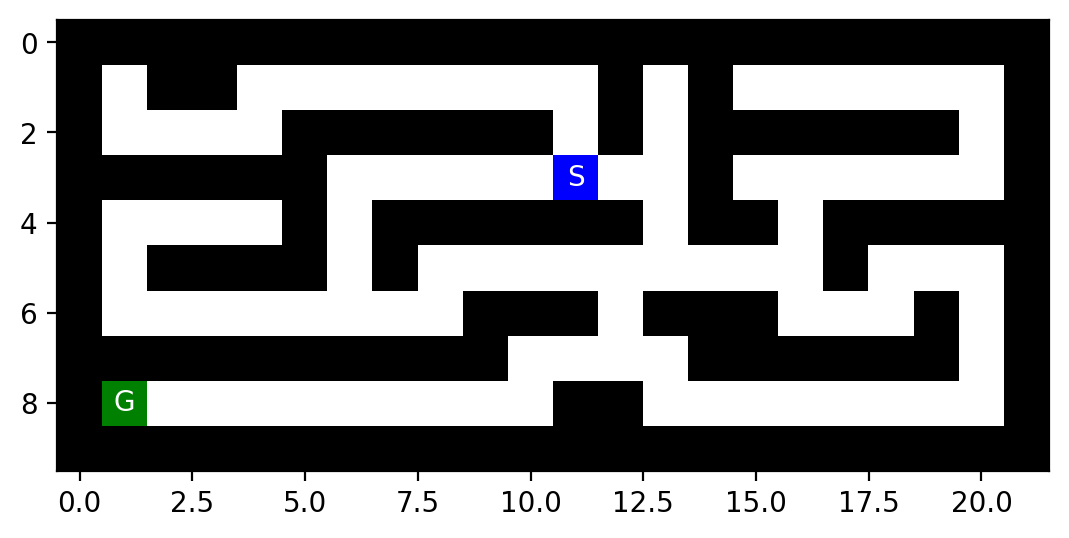

In [18]:
maze, start, goal = load_maze("../lab02_02_search/small_maze.txt")
mh.show_maze(maze)


--- BFS ---
Path length: 19
Reached nodes: 93
Path: [(3, 11), (3, 12), (3, 13), (4, 13), (5, 13), (5, 12), (6, 12), (7, 12), (7, 11), (7, 10), (8, 10), (8, 9), (8, 8), (8, 7), (8, 6), (8, 5), (8, 4), (8, 3), (8, 2), (8, 1)]


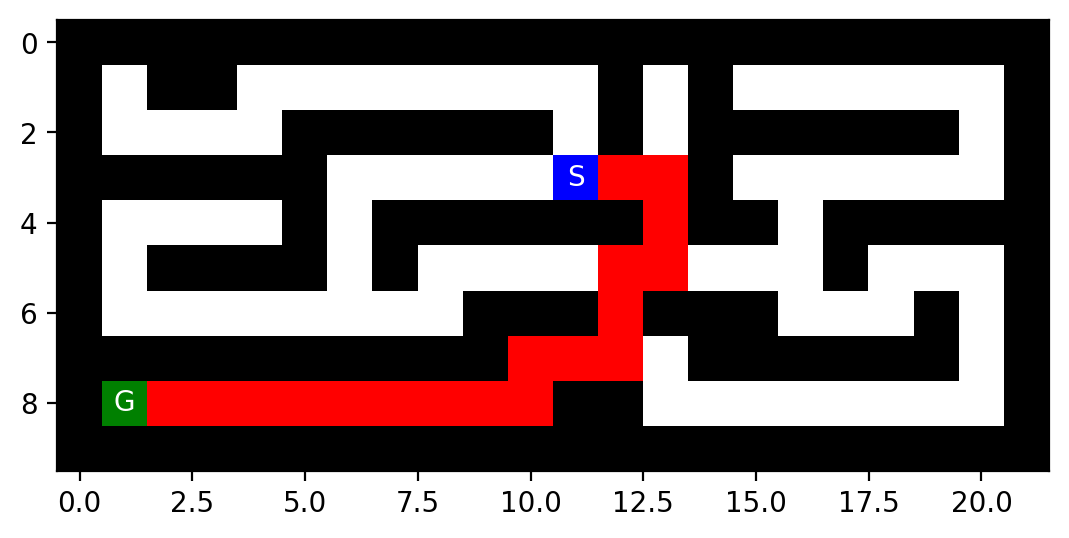

In [19]:
# BFS
bfs_path, bfs_reached = breadth_first_search(start, goal, maze)
print("\n--- BFS ---")
print(f"Path length: {len(bfs_path)-1}")
print(f"Reached nodes: {len(bfs_reached)}")
print(f"Path: {bfs_path}")
mh.show_maze(mark_path(maze, bfs_path))


--- DFS ---
Path length: 29
Reached nodes: 54
Path: [(3, 11), (3, 10), (3, 9), (3, 8), (3, 7), (3, 6), (4, 6), (5, 6), (6, 6), (6, 7), (6, 8), (5, 8), (5, 9), (5, 10), (5, 11), (5, 12), (6, 12), (7, 12), (7, 11), (7, 10), (8, 10), (8, 9), (8, 8), (8, 7), (8, 6), (8, 5), (8, 4), (8, 3), (8, 2), (8, 1)]


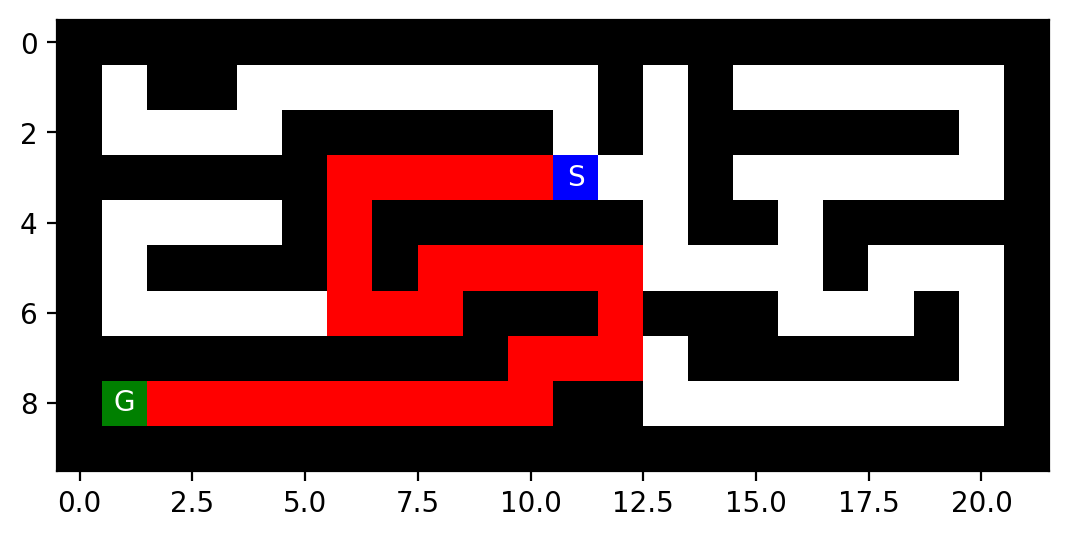

In [20]:
# DFS
dfs_path, dfs_reached = depth_first_search(start, goal, maze)
print("\n--- DFS ---")
print(f"Path length: {len(dfs_path)-1}")
print(f"Reached nodes: {len(dfs_reached)}")
print(f"Path: {dfs_path}")
mh.show_maze(mark_path(maze, dfs_path))

BFS và DFS (không có cấu trúc dữ liệu reached) xử lý các vòng lặp (chu trình) như thế nào?

# Thảo luận
Nếu không có cấu trúc dữ liệu reached/visited, cả BFS và DFS đều có thể rơi vào vòng lặp vô hạn khi đồ thị hoặc mê cung chứa chu trình.

- BFS: Vì nó mở rộng các nút theo từng cấp độ, nếu có chu trình, cùng một nút sẽ được đưa vào hàng đợi nhiều lần, gây ra sự gia tăng theo cấp số nhân trong biên giới và có thể không bao giờ kết thúc.
- DFS: DFS sẽ liên tục đi sâu vào cùng một chu trình mà không đánh dấu các nút đã thăm, điều này cũng có thể gây ra đệ quy vô hạn hoặc tràn ngăn xếp.
- Do đó, để xử lý các vòng lặp một cách an toàn, cả hai thuật toán đều yêu cầu một tập hợp reached/visited để tránh việc quay lại các trạng thái giống nhau.

Các triển khai của bạn có hoàn chỉnh và tối ưu không? Giải thích tại sao. Độ phức tạp về thời gian và không gian của mỗi triển khai **của bạn** là gì? Đặc biệt thảo luận về sự khác biệt trong độ phức tạp không gian giữa BFS và DFS.

# Thảo luận
- Tính đầy đủ:
  + BFS là đầy đủ vì nếu một đường đi tồn tại, nó sẽ tìm ra nó. 
  + DFS không được đảm bảo là đầy đủ trong các đồ thị vô hạn hoặc có chu trình, nhưng trong một mê cung hữu hạn 
    với một tập hợp đã được thăm, nó sẽ tìm ra giải pháp nếu một giải pháp tồn tại. 
- Tính tối ưu:
  + BFS là tối ưu trong các đồ thị không có trọng số vì nó luôn tìm ra đường đi ngắn nhất 
    (Chiều dài đường đi = 19). 
  + DFS không tối ưu, vì nó có thể trả về một đường đi dài hơn (Chiều dài đường đi = 29).
- Độ phức tạp thời gian:
  Cả BFS và DFS đều có độ phức tạp thời gian O(V + E), trong đó V là số lượng nút (ô) 
  và E là số lượng cạnh (các bước di chuyển có thể).
- Độ phức tạp không gian:
  + BFS yêu cầu O(V) không gian trong trường hợp xấu nhất vì nó giữ tất cả các nút ở biên giới 
  tại cấp độ hiện tại (do đó nó đã đạt được 93 nút).
  + DFS chỉ yêu cầu không gian O(depth) cho đệ quy/stack, vì vậy trên thực tế nó sử dụng ít nút hơn (54 nút đã đạt được). 
- Đây là sự khác biệt chính: BFS đánh đổi không gian để đạt được tính tối ưu, 
  trong khi DFS sử dụng ít bộ nhớ hơn nhưng không tối ưu.

## Nhiệm vụ 3 [Hiếu]: Tìm kiếm có thông tin: Triển khai tìm kiếm tham lam tốt nhất và tìm kiếm A* [20 Điểm]

Bạn có thể sử dụng bản đồ để ước lượng khoảng cách từ vị trí hiện tại của bạn đến mục tiêu bằng cách sử dụng khoảng cách Manhattan (xem https://en.wikipedia.org/wiki/Taxicab_geometry) như một hàm heuristic. Cả hai thuật toán đều dựa trên tìm kiếm Tốt Nhất, chỉ cần thay đổi nhỏ từ thuật toán BFS mà bạn đã triển khai (xem sách giáo khoa/bài trình bày).

In [21]:
# Your code goes here
import heapq
import itertools
# ---------------- Manhattan distance ----------------
def manhattan(a, b):
    return abs(a[0] - b[0]) + abs(a[1] - b[1])

# Counter to break ties in heap
counter = itertools.count()

# ---------------- Greedy Best First Search ----------------
def greedy_best_first_search(start, goal, maze):
    frontier = []
    heapq.heappush(frontier, (manhattan(start, goal), next(counter), Node(start)))
    reached = set([start])

    while frontier:
        _, _, node = heapq.heappop(frontier)

        if node.pos == goal:
            return node.path(), len(reached)

        for move, (dr, dc) in [("R",(0,1)), ("D",(1,0)), ("L",(0,-1)), ("U",(-1,0))]:
            r, c = node.pos[0] + dr, node.pos[1] + dc
            if maze[r][c] != "X" and (r, c) not in reached:
                reached.add((r, c))
                child = Node((r, c), node, move, node.cost + 1)
                heapq.heappush(frontier, (manhattan((r, c), goal), next(counter), child))

    return None, len(reached)

# ---------------- A* Search ----------------
def astar_search(start, goal, maze):
    frontier = []
    heapq.heappush(frontier, (manhattan(start, goal), next(counter), Node(start)))
    reached = {start: 0}

    while frontier:
        _, _, node = heapq.heappop(frontier)

        if node.pos == goal:
            return node.path(), len(reached)

        for move, (dr, dc) in [("R",(0,1)), ("D",(1,0)), ("L",(0,-1)), ("U",(-1,0))]:
            r, c = node.pos[0] + dr, node.pos[1] + dc
            if maze[r][c] != "X":
                new_cost = node.cost + 1
                if (r, c) not in reached or new_cost < reached[(r, c)]:
                    reached[(r, c)] = new_cost
                    child = Node((r, c), node, move, new_cost)
                    f = new_cost + manhattan((r, c), goal)
                    heapq.heappush(frontier, (f, next(counter), child))

    return None, len(reached)

--- Greedy Best-First Search ---
Path length: 29
Reached nodes: 44
Path: [(3, 11), (3, 10), (3, 9), (3, 8), (3, 7), (3, 6), (4, 6), (5, 6), (6, 6), (6, 7), (6, 8), (5, 8), (5, 9), (5, 10), (5, 11), (5, 12), (6, 12), (7, 12), (7, 11), (7, 10), (8, 10), (8, 9), (8, 8), (8, 7), (8, 6), (8, 5), (8, 4), (8, 3), (8, 2), (8, 1)]


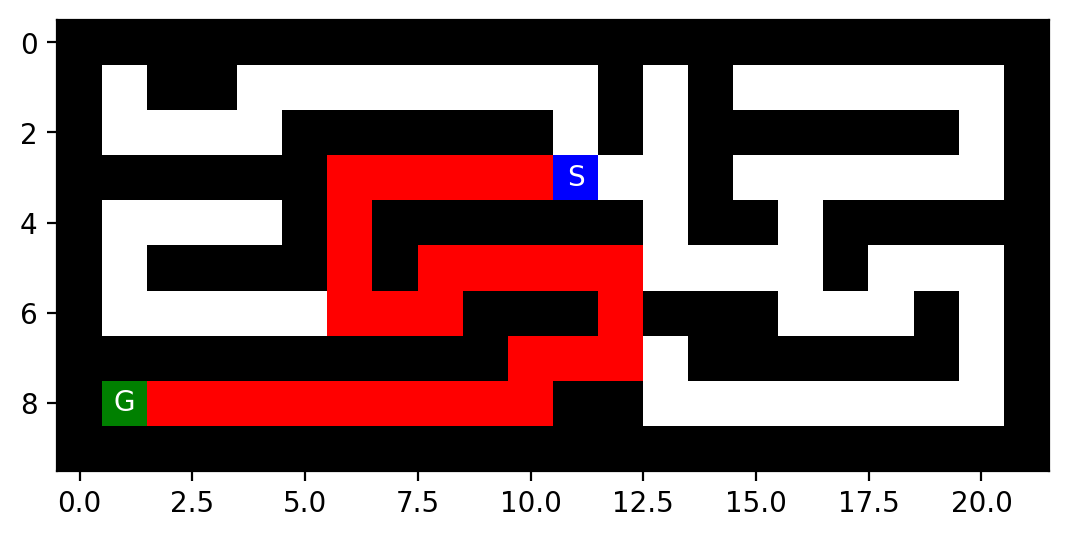

In [22]:
# GVFS
gbfs_path, gbfs_reached = greedy_best_first_search(start, goal, maze)
print("--- Greedy Best-First Search ---")
print("Path length:", len(gbfs_path)-1)
print("Reached nodes:", gbfs_reached)
print("Path:", gbfs_path)
mh.show_maze(mark_path(maze, gbfs_path))


--- A* Search ---
Path length: 19
Reached nodes: 59
Path: [(3, 11), (3, 12), (3, 13), (4, 13), (5, 13), (5, 12), (6, 12), (7, 12), (7, 11), (7, 10), (8, 10), (8, 9), (8, 8), (8, 7), (8, 6), (8, 5), (8, 4), (8, 3), (8, 2), (8, 1)]


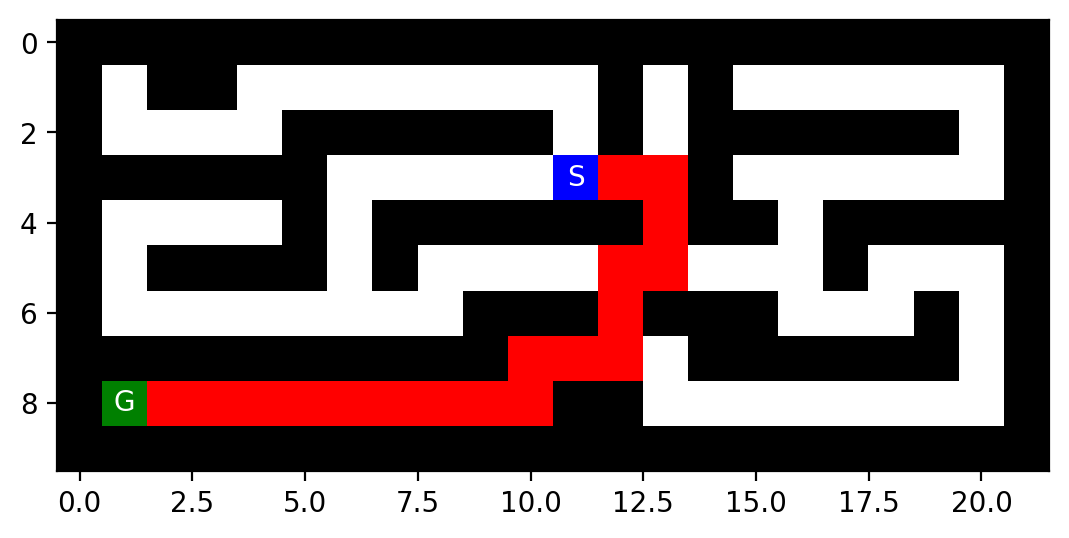

In [23]:
# A* Search 
astar_path, astar_reached = astar_search(start, goal, maze)
print("\n--- A* Search ---")
print("Path length:", len(astar_path)-1)
print("Reached nodes:", astar_reached)
print("Path:", astar_path)
mh.show_maze(mark_path(maze, astar_path))

Các triển khai của bạn đã hoàn chỉnh và tối ưu chưa? Độ phức tạp về thời gian và không gian là gì?

# Thảo luận
- Tìm kiếm tốt nhất tham lam (GBFS):
    + Tính đầy đủ: GBFS không đầy đủ trong tổng quát. Nếu có vòng lặp hoặc ngõ cụt, nó có thể bị kẹt trong việc khám phá con đường sai mãi mãi.
    + Tính tối ưu: GBFS không tối ưu. Nó chọn nút có vẻ gần nhất với mục tiêu theo cách tiếp cận, nhưng điều này có thể không phải là con đường ngắn nhất thực sự.
    + Từ đầu ra, GBFS đã tìm thấy một con đường có độ dài 29, dài hơn con đường tối ưu.
    + Độ phức tạp thời gian: O(b^m) trong trường hợp xấu nhất (trong đó b là hệ số phân nhánh, m là độ sâu tối đa). Nó vẫn có thể khám phá nhiều phần lớn của mê cung.
    + Độ phức tạp không gian: O(b^m) vì nó lưu trữ biên giới. Trong thực tế, nó sử dụng ít bộ nhớ hơn BFS nhưng vẫn có thể phát triển lớn.
- Tìm kiếm A*:
    + Tính đầy đủ: A* là đầy đủ miễn là chi phí bước là dương (điều này đúng trong mê cung của chúng ta).
    + Tính tối ưu: A* là tối ưu nếu hàm đánh giá là chấp nhận được (không bao giờ ước lượng quá cao chi phí thực). Khoảng cách Manhattan là chấp nhận được trong mê cung lưới, vì vậy con đường tìm được được đảm bảo là tối ưu. Từ đầu ra, A* đã tìm thấy con đường ngắn nhất có độ dài 19.
    + Độ phức tạp thời gian: O(b^d), trong đó d là độ sâu của giải pháp tối ưu. Trong trường hợp xấu nhất, nó có thể mở rộng nhiều nút nhưng hiệu quả hơn nhiều so với GBFS.
- So sánh:
    + GBFS đã đạt được ít nút hơn (44) nhưng tạo ra một lộ trình không tối ưu (29 bước).
    + A* đã đạt được nhiều nút hơn (59) nhưng tạo ra lộ trình tối ưu (19 bước).
    + Do đó, A* đánh đổi nhiều bộ nhớ và thời gian hơn để đảm bảo tính tối ưu, trong khi GBFS nhanh hơn và nhẹ hơn nhưng có thể trả về những lộ trình dài hơn.

## Nhiệm vụ 4: So sánh và thảo luận [20 Điểm]

Chạy các thí nghiệm để so sánh các thuật toán đã được triển khai.

Cách giải quyết các vấn đề:

* Việc triển khai của bạn trả về kết quả không mong đợi: Hãy cố gắng gỡ lỗi và sửa mã. Việc trực quan hóa mê cung, đường đi hiện tại và biên giới sau mỗi bước là rất hữu ích. Nếu mã vẫn không hoạt động, hãy đánh dấu kết quả bằng một dấu hoa thị (*) và mô tả vấn đề dưới bảng.

* Việc triển khai của bạn không thể giải quyết một mê cung cụ thể một cách nhất quán và kết thúc trong một vòng lặp vô hạn:  
    Gỡ lỗi (có thể vấn đề là ở biên giới và kiểm tra chu trình cho DFS). Nếu đây là một thiếu sót của thuật toán/triển khai, thì hãy ghi "N/A*" trong bảng kết quả và mô tả lý do tại sao điều này xảy ra.

In [ ]:
# Add code

Hoàn thành bảng sau cho mỗi mê cung.

__Small maze__

| algorithm | path cost | # of nodes expanded | max tree depth | max # of nodes in memory | max frontier size |
|-----------|-----------|----------------|----------------|---------------|-------------------|
| BFS       |           |                |                |               |                   |
| DFS       |           |                |                |               |                   |
| GBS       |           |                |                |               |                   |
| A*        |           |                |                |               |                   |

__Medium Maze__

...

Trình bày kết quả dưới dạng biểu đồ (xem [Python Code Examples/charts and tables](../HOWTOs/charts_and_tables.ipynb)).

In [ ]:
# Add charts

Thảo luận về những bài học quan trọng nhất mà bạn đã học được từ việc thực hiện các chiến lược tìm kiếm khác nhau.

In [ ]:
# Add discussion

## Nhiệm vụ nâng cao: IDS và nhiều mục tiêu

* __Sinh viên tốt nghiệp__ cần hoàn thành nhiệm vụ này [10 điểm]
* __Sinh viên đại học__ có thể thử nghiệm nhiệm vụ này như một nhiệm vụ thưởng [tối đa +5 điểm thưởng].

### IDS
Triển khai IDS (tìm kiếm sâu lặp lại) bằng cách sử dụng triển khai DFS của bạn. Kiểm tra IDS trên các mê cung ở trên. Bạn có thể gặp một số vấn đề với các mê cung có không gian mở. Nếu bạn không thể giải quyết các vấn đề, hãy báo cáo và thảo luận về nguyên nhân gây ra các vấn đề đó.

In [ ]:
# Your code/answer goes here

### Nhiều Mục Tiêu
Tạo một vài mê cung với nhiều mục tiêu bằng cách thêm một hoặc hai mục tiêu nữa vào mê cung kích thước trung bình. Đại lý hoàn thành khi tìm thấy một trong các mục tiêu.
Giải mê cung với các triển khai của bạn cho DFS, BFS và IDS. Thực hiện các thí nghiệm để cho thấy các triển khai nào tìm ra giải pháp tối ưu và các triển khai nào không. Thảo luận về lý do tại sao lại như vậy.

In [ ]:
# Your code/answer goes here

## Những Vấn Đề Nâng Cao Hơn Để Suy Nghĩ (không tính điểm)

Nếu bài tập quá dễ đối với bạn thì bạn có thể suy nghĩ về những vấn đề sau. Những vấn đề này khó khăn và không thuộc về bài tập này.

### Giao điểm như các trạng thái
Thay vì định nghĩa mỗi ô vuông là một trạng thái, chỉ sử dụng các giao điểm làm trạng thái. Bây giờ yêu cầu lưu trữ được giảm, nhưng độ dài đường đi giữa hai giao điểm có thể khác nhau. Nếu chúng ta sử dụng tổng độ dài đường đi được đo bằng số ô vuông làm chi phí đường đi, làm thế nào chúng ta có thể đảm bảo rằng BFS và tìm kiếm sâu lặp lại là tối ưu? Thay đổi mã để làm điều đó.

In [ ]:
# Your code/answer goes here

### Tìm kiếm A* có trọng số
Chỉnh sửa tìm kiếm A* của bạn để thêm trọng số (xem sách giáo khoa) và khám phá cách mà các trọng số khác nhau ảnh hưởng đến kết quả.

In [ ]:
# Your code/answer goes here

### Mê Cung Không Xác Định
Điều gì xảy ra nếu tác nhân không biết trước bố cục của mê cung? Điều này có nghĩa là tác nhân phải đối mặt với một môi trường không xác định, nơi mà nó không biết hàm chuyển đổi. Môi trường sẽ trông như thế nào (mô tả PEAS)? Bạn sẽ triển khai một tác nhân hợp lý để giải quyết mê cung như thế nào? Điều gì sẽ xảy ra nếu tác nhân vẫn có một thiết bị GPS để cho biết khoảng cách đến mục tiêu?

In [ ]:
# Your code/answer goes here